In [ ]:
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import webcolors
import matplotlib.colors as mc

In [ ]:
img = cv2.imread(r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(f"dimensions = {img.shape}")
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img, interpolation='none')
plt.title('Original Image')
plt.show()


# detect the contours on the binary image using cv2.CHAIN_APPROX_NONE
ret , thresh = cv2.threshold(imgGry, 250 , 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# draw contours on the original image
cv2.drawContours(image=imgGry, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
# see the results
RGB_imgGry = cv2.cvtColor(imgGry, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_imgGry, interpolation='none')
plt.title('Gray Image Image')
plt.show()

In [ ]:
len(contours)

In [ ]:
for contour in contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    if (w > 100) and (h >100):
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")

In [ ]:
img = cv2.imread(r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg')
imgGry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
RGB_imgGry = cv2.cvtColor(imgGry, cv2.COLOR_BGR2RGB)
ret, thresh = cv2.threshold(RGB_imgGry, 150, 255, cv2.THRESH_BINARY)

# visualize the binary image
plt.imshow(thresh, interpolation='none')
plt.title('B/W Image Image')
plt.show()

In [ ]:
contours, hierarchy = cv2.findContours(image=ret, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
len(contours)

In [ ]:
import cv2

def bw_scale(file_name, tresh_min, tresh_max):
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #(thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    (thresh, im_bw) = cv2.threshold(image, tresh_min, tresh_max, 0)

    cv2.imwrite('bw_'+file_name, im_bw)
    return (thresh, im_bw)

def edge_detect(file_name, tresh_min, tresh_max):
    (thresh, im_bw) = bw_scale(file_name, tresh_min, tresh_max)
    contours, hierarchy = cv2.findContours(im_bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return (contours, hierarchy, im_bw)



filepath = r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg'
contours, hierarchy, imbw = edge_detect(filepath, 128, 255)
print(len(contours))
    

In [ ]:
# visualize the binary image
plt.imshow(imbw, interpolation='none')
plt.title('B/W Image Image')
plt.show()

In [ ]:
for contour in Contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    if (w > 300) and (h >300) and (yc > 10) and (xc > 10):
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")
        cropped_image = img[yc:yc+h,xc:xc+w]
        # visualize the binary image
        plt.imshow(cropped_image, interpolation='none')
        plt.title('B/W Image Image')
        plt.show()

In [1]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=1400
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

xc 399, yc 217, w 732, h 447


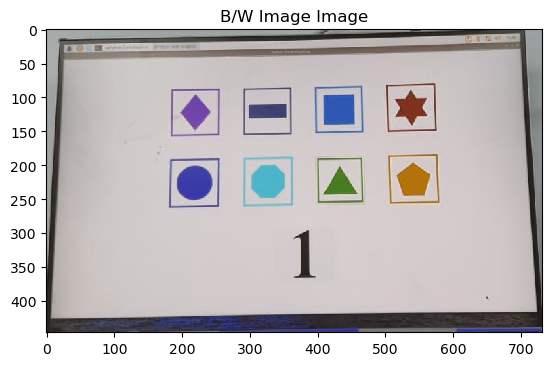

In [2]:
for contour in Contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    if (w > 200) and (h >200) and (yc > 10) and (xc > 10):
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")
        cropped_image = img[yc:yc+h,xc:xc+w]
        # visualize the binary image
        plt.imshow(cropped_image, interpolation='none')
        plt.title('B/W Image Image')
        plt.show()

In [3]:
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [4]:
print(len(Contours))

201


In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r'C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\DetectShapes\pic_test.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=1400
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for contour in Contours:
    if cv2.contourArea(contour) > MIN_CONTOUR_AREA:
        [X, Y, W, H] = cv2.boundingRect(contour)
        box=cv2.rectangle(img, (X, Y), (X + W, Y + H), (0,0,255), 2)

cropped_image = img[Y:Y+H, X:X+W]
print([X,Y,W,H])
# visualize the binary image
plt.imshow(img, interpolation='none')
plt.title('B/W Image Image')
plt.show()
plt.imshow(cropped_image, interpolation='none')
plt.title('B/W Image Image')
plt.show()